# Bienvenidos a la quinta práctica de Física Computacional 2024-2: repaso de derivadas y Github. 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl

### Ejercicio 1: considere la siguiente regla de derivación

\begin{align*}
f'(x_0) \approx \frac{-f(x_0 + 2h) +8f(x_0+h) - 8f(x_0-h) + f(x_0-2h)}{12h}
\end{align*}

Sea $f(x) = e^{x}$,
* Cree un programa que calcule la aproximación para $f'(2.3)$ usando dicha fórmula, con $h=0.1$ y $h=0.01$. Además muestre el resultado con 5 cifras significativas.
* Compare los valores obtenidos con $f'(2.3) = e^{2.3}$.

In [91]:
import numpy as np
import matplotlib.pyplot as plt

#definimos las variables
x = 2.3
f = np.exp
f_analitica = np.exp(x)

deriv_5points = lambda f,x,h: ( -f(x+2*h) + 8*f(x+h) - 8*f(x-h) + f(x-2*h) ) / (12*h)
error_abs = np.abs(deriv_5points(f,2.3,0.1) - f_analitica)

print(f'La derivada es aproximadamente {deriv_5points(f,2.3,0.1):.5f} y su error absoluto es', error_abs)

La derivada es aproximadamente 9.97415 y su error absoluto es 3.328687801840147e-05


### Ejercicio 2: considere las siguientes reglas de derivación

* $\text{Fórmula del extremo de tres puntos:}\;f'(x_0) \approx \frac{1}{2h} [- 3f(x_0) + 4f(x_0+h) - f(x_0+2h)] $

* $\text{Fórmula del punto medio de tres puntos:}\; f'(x_0) \approx \frac{1}{2h}[f(x_0 + h) - f(x_0 - h)] $

* $\text{Fórmula del punto medio de cinco puntos:}\; f'(x_0) \approx \frac{1}{12h}[-f(x_0 + 2h) +8f(x_0+h) - 8f(x_0-h) + f(x_0-2h)] $

* $\text{Fórmula del extremo de cinco puntos:}\; f'(x_0) \approx\frac{1}{12h}[-25f(x_0) + 48f(x_0+h) - 36f(x_0+2h) + 16f(x_0 + 3h) -3f(x_0+4h)] $

### Los valores para cierta función $f(x)$ se dan en el archivo *Tablita.txt* . Utilice las fórmulas mostradas que le sean útiles para aproximar $f'(2.0)$.

*Tip: revise primero los datos de la tabla*

In [75]:
# Lectura de datos
datos = np.genfromtxt('txt/Tablita.txt', delimiter=',') #asegurese de escribir bien el archivo y su ubicacion
x = datos[1:,0]
f_x = datos[1:,1]

pos = np.where(x==2.0)
print(pos)

(array([2], dtype=int64),)


### Extremo de 3 puntos

In [76]:
#Extremo de 3 puntos
H = 0.1 #Elegimos este h pues coincide con los datos de la tabla (también pudo ser h=-0.1)
deriv_3p_ext = (-3*f_x[2] + 4*f_x[3] - f_x[4]) / (2*H)
print(f'{deriv_3p_ext:.5f}')

22.03231


##### Idea intuitiva: primer dato

In [77]:
h = x[1]-x[0] #h será el interespaciado entre los valores de x
deriv_3p = (-3*f_x[0] + 4*f_x[1] - f_x[2]) / (2*h)
print(h)

0.09999999999999987


In [78]:
deriv_3p_2 = []

for i in range(len(x)-2):
    deriv = (-3*f_x[i+0] + 4*f_x[i+1] - f_x[i+2]) / (2*h)
    deriv_3p_2.append(deriv)

In [79]:
deriv_3p_3 = [None]*(len(x)-2)

for i in range(len(x)-2):
    deriv_3p_3[i] = (-3*f_x[i+0] + 4*f_x[i+1] - f_x[i+2]) / (2*h)

print(deriv_3p_3[2])

22.032310000000017


In [80]:
deriv_3p_4 = (-3*f_x[0:-2] + 4*f_x[1:-1] - f_x[2:]) / (2*h)
print(x[pos],deriv_3p_4[pos])

[2.] [22.03231]


### Punto medio de 3 puntos

In [81]:
#Punto medio de 3 puntos
H = 0.1 #También pudo ser h = 0.2
deriv_3p_mid = (f_x[3]-f_x[1]) / (2*H)
print(f'{deriv_3p_mid:.5f}')

22.22879


##### idea intuitiva: segundo dato

In [82]:
h = x[1]-x[0]
pos = np.where(x==2.00)
deriv_3p_mid = (f_x[2]-f_x[0]) / (2*h)

In [83]:
deriv_3p_mid_1 = []

for i in range(len(x)-1):
    deriv = ( f_x[i+1] - f_x[i-1] ) / (2*h)
    deriv_3p_mid_1.append(deriv)

print(deriv_3p_mid_1[2])

22.22879000000003


In [84]:
deriv_3p_mid_3 = [None]*(len(x)-1)

for i in range(len(x)-1):
    deriv_3p_mid_3[i] = ( f_x[i+1] - f_x[i-1] ) / (2*h)
    

print(deriv_3p_mid_3[2])

22.22879000000003


### Punto medio de 5 puntos

In [85]:
#Punto medio de 5 puntos
h = 0.1
deriv_5p_mid = (-f_x[4] + 8*f_x[3] - 8*f_x[1] + f_x[0]) / (12*h)
print(f'{deriv_5p_mid:.5f}')


22.16700


In [86]:
h = x[1]-x[0]
pos = np.where(x==2.00)
deriv_5p_mid = (-f_x[4] + 8*f_x[3] - 8*f_x[1] + f_x[0]) / (12*h)

In [87]:
deriv_5p_mid_1 = []

for i in range(len(x)-2):
    deriv = (-f_x[i+2] + 8*f_x[i+1] - 8*f_x[i-1] + f_x[i-2]) / (12*h)
    deriv_5p_mid_1.append(deriv)

print(deriv_5p_mid_1[2])

22.16699916666669


In [88]:
deriv_5p_mid_2 = [None]*(len(x)-2)

for i in range(len(x)-2):
    deriv_5p_mid_2[i] = (-f_x[i+2] + 8*f_x[i+1] - 8*f_x[i-1] + f_x[i-2]) / (12*h)
    
print(deriv_5p_mid_2[2])

22.16699916666669


*Spoiler: la función era $f(x) = xe^{x}$*

### Ejercicio 3: derivadas parciales.

\begin{align*}
\frac{\partial f}{\partial x} \approx \frac{ f(x+\frac{h}{2},y) - f(x-\frac{h}{2},y)}{h} \\
\frac{\partial f}{\partial y} \approx \frac{ f(x,y+\frac{h}{2}) - f(x,y-\frac{h}{2})}{h}
\end{align*}

#### considere la función $g(x,y) = x^{2} + y^{2}$. Compruebe la efectividad de la fórmula calculando las derivadas parciales de $g(x,y)$ en el punto $(x,y)$ que usted elija, con $h=0.01$.

In [89]:
def g(x,y):
    return x**2 + y**2
    
h = 0.01

deriv_x = lambda f,x,y: (f(x+h/2,y) - f(x-h/2,y)) / h
deriv_y = lambda f,x,y: (f(x,y+h/2) - f(x,y-h/2)) / h

print(deriv_x(g, 3, 1))
print(deriv_y(g, 3, 1))

5.999999999999872
1.9999999999999574


### Motivación: gráfico de derivadas parciales

C:\Users\valit\AppData\Local\Temp\ipykernel_11924\1697053950.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(x**2 + y**2)) #defini otra g para que se vea mejor el grafico de las derivadas


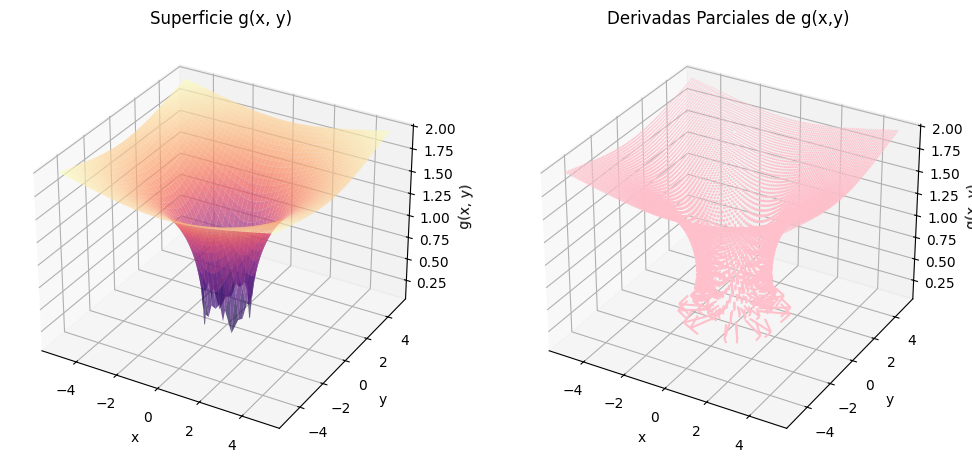

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def g(x, y):
    return np.sqrt(np.log(x**2 + y**2)) #defini otra g para que se vea mejor el grafico de las derivadas

h = 0.01

deriv_x = lambda f,x,y: (f(x+h/2,y) - f(x-h/2,y)) / h
deriv_y = lambda f,x,y: (f(x,y+h/2) - f(x,y-h/2)) / h

#grilla (meshgrid)
x_val = np.linspace(-5, 5, 100)
y_val = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_val, y_val)
Z = g(X, Y)

Z_x = deriv_x(g, X, Y)
Z_y = deriv_y(g, X, Y)

fig = plt.figure(figsize=(12, 6))

####Grafica de la funcion g(x, y)####
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='magma', alpha=0.7)
ax1.set_title('Superficie g(x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('g(x, y)')

####Grafica de las derivadas parciales####
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(X, Y, Z, Z_x, Z_y, 0, length=0.3, color='pink')
ax2.set_title('Derivadas Parciales de g(x,y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('g(x, y)')

plt.show()


### Ejercicio propuesto: segunda derivada parcial cruzada.

\begin{align*}
\frac{\partial^2 f}{\partial x \partial y} \approx \frac{ f(x + \frac{h}{2}, y+\frac{h}{2}) - f(x-\frac{h}{2},y+\frac{h}{2}) - f(x+\frac{h}{2}, y-\frac{h}{2}) + f(x-\frac{h}{2},y-\frac{h}{2}) }{h^2}
\end{align*}

#### siga las mismas instrucciones del ejercicio anterior y calcule utilizando esta fórmula la segunda derivada parcial cruzada de $g(x,y)$.